In [150]:
import numpy as np
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [151]:
def BanditGenerator(i):
    if i in [0,1,2,3,4]:
        return np.random.normal(0, 10)
    if i in [5,6,7,8]:
        return np.random.normal(1,0.1)
    if i == 9:
        return np.random.normal(1.1,1)

def random_index_of_max(lst):
    max_val = max(lst)
    max_indices = [i for i, val in enumerate(lst) if val == max_val]
    if len(max_indices) == 1:
        return max_indices[0]
    else:
        return random.choice(max_indices)

def random_index_of_NOT_max(lst):
    max_val = max(lst)
    not_max_indices = [i for i, val in enumerate(lst) if val != max_val]
    if len(not_max_indices) == 1:
        return not_max_indices[0]
    else:
        return random.choice(not_max_indices)

def cumsum(lst):
    return list(accumulate(lst))

def divide_list(lst, divisor):
    return [num / divisor for num in lst]

def multiply_list(lst, multiplier):
    return [num * multiplier for num in lst]

In [152]:
#eps-greedy
Q = [0]*10
probabilities = [0.8, 0.2] # eps-greedy parameters

i_bandit = random.randint(0, 9)
print("Zaczynamy gre od bandyty numer: ", i_bandit)

optimal_bandit = 9
optimal_action_history = []
alfa = 0.1

probabilities = [0.1,0.9] 
N_GAMES = 1000
for number_plays in range(1,N_GAMES+1):
    print("Numer gry: ", number_plays)
    
    value_from_i_th_bandit = BanditGenerator(i_bandit)
    print(f"Gramy {i_bandit}-tym bandytom i otrzymujemy: ", value_from_i_th_bandit)
    
    Q[i_bandit]= Q[i_bandit]+alfa*(value_from_i_th_bandit-Q[i_bandit])
    print("nadpisane wagi:", Q)
    
    greedy_choice = np.random.choice([0, 1], p=probabilities)
    
    max_index = Q.index(max(Q))
    if greedy_choice:
        print("greedy choice")
        i_bandit = random_index_of_max(Q) 
    else:
        print("EXPLORATION choice")
        i_bandit = random_index_of_NOT_max(Q)
    print("\n")
    
    if i_bandit==optimal_bandit:
        optimal_action_history.append(1)
    else:
        optimal_action_history.append(0)
    

Zaczynamy gre od bandyty numer:  8
Numer gry:  1
Gramy 8-tym bandytom i otrzymujemy:  0.8732759993271082
nadpisane wagi: [0, 0, 0, 0, 0, 0, 0, 0, 0.08732759993271083, 0]
greedy choice


Numer gry:  2
Gramy 8-tym bandytom i otrzymujemy:  0.9073310762102422
nadpisane wagi: [0, 0, 0, 0, 0, 0, 0, 0, 0.169327947560464, 0]
greedy choice


Numer gry:  3
Gramy 8-tym bandytom i otrzymujemy:  0.8993871217668816
nadpisane wagi: [0, 0, 0, 0, 0, 0, 0, 0, 0.24233386498110576, 0]
greedy choice


Numer gry:  4
Gramy 8-tym bandytom i otrzymujemy:  0.8796784789456703
nadpisane wagi: [0, 0, 0, 0, 0, 0, 0, 0, 0.3060683263775622, 0]
greedy choice


Numer gry:  5
Gramy 8-tym bandytom i otrzymujemy:  1.057524728711401
nadpisane wagi: [0, 0, 0, 0, 0, 0, 0, 0, 0.3812139666109461, 0]
greedy choice


Numer gry:  6
Gramy 8-tym bandytom i otrzymujemy:  0.9323383061456976
nadpisane wagi: [0, 0, 0, 0, 0, 0, 0, 0, 0.43632640056442124, 0]
greedy choice


Numer gry:  7
Gramy 8-tym bandytom i otrzymujemy:  0.94632847831

In [153]:
cumsuma = cumsum(optimal_action_history)
divided_list = [num / (index + 1) for index, num in enumerate(cumsuma)]
percentge_list = multiply_list(divided_list,100)

In [168]:
#GREEDY
Q = [5]*10

i_bandit = random.randint(0, 9)
print("Zaczynamy gre od bandyty numer: ", i_bandit)

optimal_bandit = 9
optimal_action_history = []
alfa = 0.1

N_GAMES = 1000
for number_plays in range(1,N_GAMES+1):
    print("Numer gry: ", number_plays)
    
    value_from_i_th_bandit = BanditGenerator(i_bandit)
    print(f"Gramy {i_bandit}-tym bandytom i otrzymujemy: ", value_from_i_th_bandit)
    
    Q[i_bandit]= Q[i_bandit]+alfa*(value_from_i_th_bandit-Q[i_bandit])
    print("nadpisane wagi:", Q)
    
    max_index = Q.index(max(Q))
    i_bandit = random_index_of_max(Q)
    
    print("\n")
    
    if i_bandit==optimal_bandit:
        optimal_action_history.append(1)
    else:
        optimal_action_history.append(0)
    
cumsuma = cumsum(optimal_action_history)
divided_list = [num / (index + 1) for index, num in enumerate(cumsuma)]
percentge_list_GREEDY = multiply_list(divided_list,100)

Zaczynamy gre od bandyty numer:  3
Numer gry:  1
Gramy 3-tym bandytom i otrzymujemy:  1.529584700218243
nadpisane wagi: [5, 5, 5, 4.652958470021824, 5, 5, 5, 5, 5, 5]


Numer gry:  2
Gramy 7-tym bandytom i otrzymujemy:  1.0483525483520444
nadpisane wagi: [5, 5, 5, 4.652958470021824, 5, 5, 5, 4.604835254835204, 5, 5]


Numer gry:  3
Gramy 8-tym bandytom i otrzymujemy:  1.0441849027541372
nadpisane wagi: [5, 5, 5, 4.652958470021824, 5, 5, 5, 4.604835254835204, 4.604418490275414, 5]


Numer gry:  4
Gramy 2-tym bandytom i otrzymujemy:  9.292860414370779
nadpisane wagi: [5, 5, 5.429286041437078, 4.652958470021824, 5, 5, 5, 4.604835254835204, 4.604418490275414, 5]


Numer gry:  5
Gramy 2-tym bandytom i otrzymujemy:  11.19386858543258
nadpisane wagi: [5, 5, 6.005744295836628, 4.652958470021824, 5, 5, 5, 4.604835254835204, 4.604418490275414, 5]


Numer gry:  6
Gramy 2-tym bandytom i otrzymujemy:  3.013501143301285
nadpisane wagi: [5, 5, 5.706519980583094, 4.652958470021824, 5, 5, 5, 4.60483525

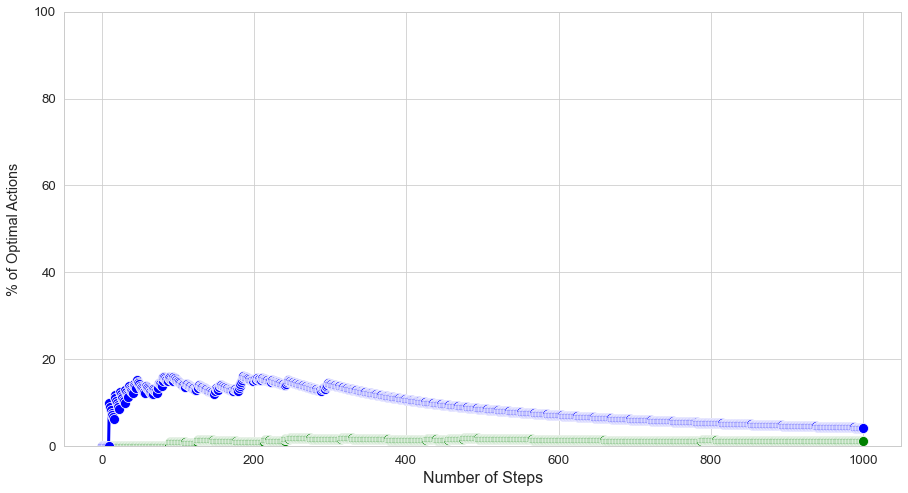

In [169]:
plt.figure(figsize=(15, 8))

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)


sns.lineplot(x=range(1, N_GAMES + 1), y=percentge_list, marker='o', linewidth=3, markersize=10,color='green')
sns.lineplot(x=range(1, N_GAMES + 1), y=percentge_list_GREEDY, marker='o', linewidth=3, markersize=10,color='blue')

plt.text(-0.06, 0.5, '% of Optimal Actions', ha='center', va='center', rotation='vertical', transform=plt.gca().transAxes)
plt.ylim(0, 100)
plt.xlabel('Number of Steps', fontsize=16)

plt.show()